In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import joblib
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import *
from sklearn import metrics
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/Users/gogo/Datathon/heart-disease-genshin-launching-main/heart_train.csv')
df['Sex'].replace(['M', 'F'], [1, 0], inplace=True)
df['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'], [0, 1, 2, 3], inplace=True)
df['RestingECG'].replace(['Normal', 'ST', 'LVH'], [0, 1, 2], inplace=True)
df['ExerciseAngina'].replace(['N', 'Y'], [0, 1], inplace=True)
df['ST_Slope'].replace(['Flat', 'Up', 'Down'], [0, 1, 2], inplace=True)

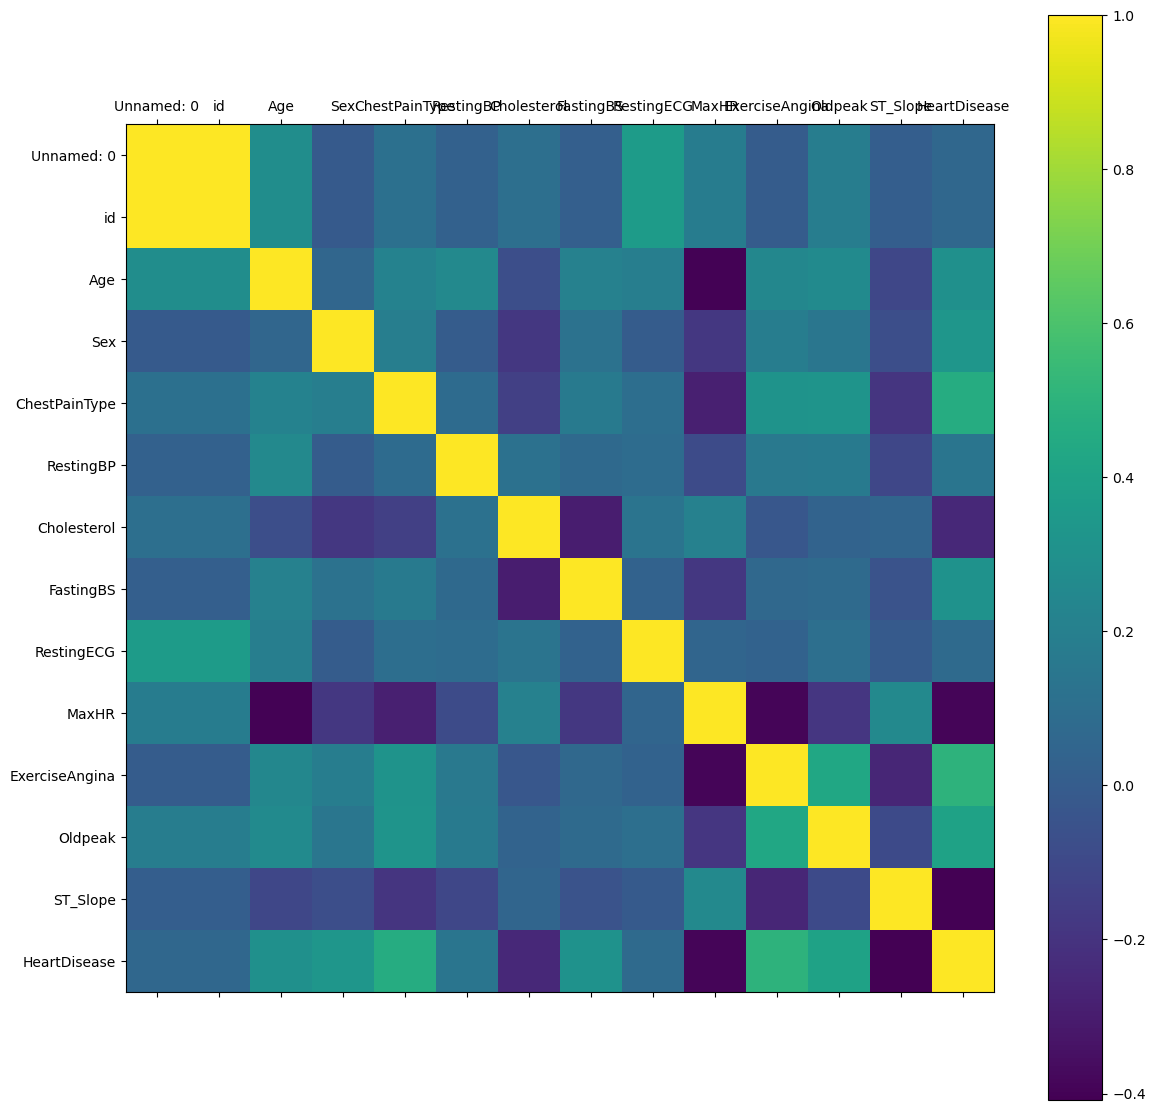

In [3]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'ChestPainType'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'ST_Slope'}>,
        <Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

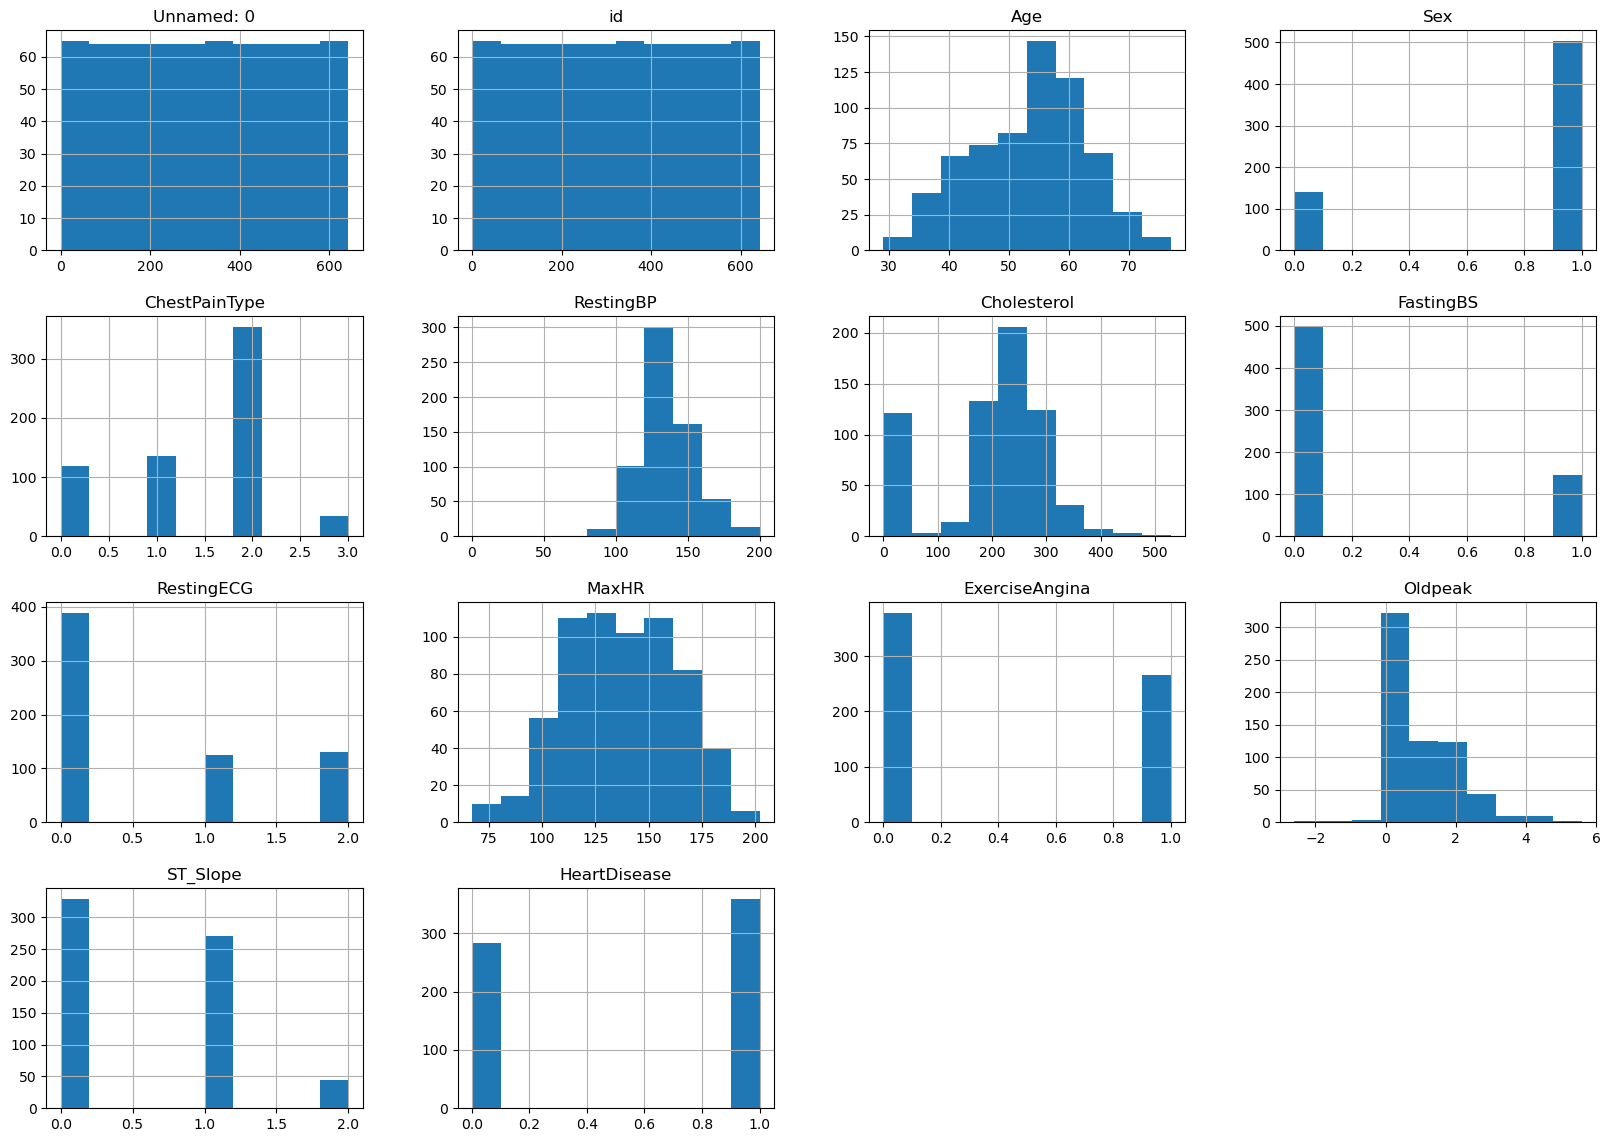

In [4]:
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

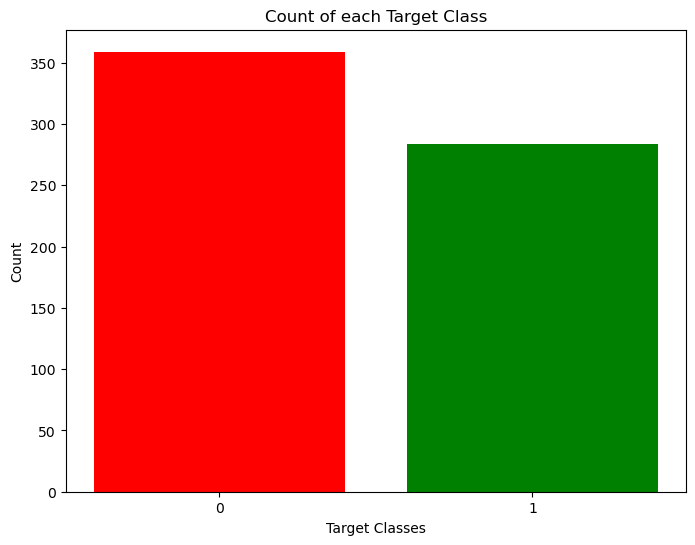

In [5]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['HeartDisease'].unique(), df['HeartDisease'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [6]:
# # Using StandardScaler to scale dataset

# df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina'])

# standardScaler = StandardScaler()
# columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [7]:
# Split train and test data

X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [8]:
# # Use KNeighborsClassifier model to train

# knn_scores = []
# for k in range(1,21):
#     knn_classifier = KNeighborsClassifier(n_neighbors = k)
#     knn_classifier.fit(X_train, y_train)
#     knn_scores.append(knn_classifier.score(X_test, y_test))

In [9]:
# # Plot the score of the model

# plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
# for i in range(1,21):
#     plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
# plt.xticks([i for i in range(1, 21)])
# plt.xlabel('Number of Neighbors (K)')
# plt.ylabel('Scores')
# plt.title('KNeighborsClassifier scores for different K values')

In [10]:
# # KNearestNeighborsClassifier accuracy report

# predictions = knn_classifier.predict(X_test)
# score_knn = accuracy_score(y_test, predictions)
# print('Accuracy: ', score_knn)
# print('Recall: ', recall_score(y_test, predictions, zero_division=1))
# print('Precision: ', precision_score(y_test, predictions, zero_division=1))
# print('CL Report:\n', classification_report(y_test, predictions, zero_division=1))

In [11]:
# # Use SupportVectorClassifier model to train

# svc_scores = []
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# for i in range(len(kernels)):
#     svc_classifier = SVC(kernel = kernels[i])
#     svc_classifier.fit(X_train, y_train)
#     svc_scores.append(svc_classifier.score(X_test, y_test))

In [12]:
# # Plot the score of the model

# colors = rainbow(np.linspace(0, 1, len(kernels)))
# plt.bar(kernels, svc_scores, color = colors)
# for i in range(len(kernels)):
#     plt.text(i, svc_scores[i], svc_scores[i])
# plt.xlabel('Kernels')
# plt.ylabel('Scores')
# plt.title('SupportVectorClassifier scores for different kernels')
# print("The score for SupportVectorClassifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

In [13]:
# # SupportVectorClassifier accuracy report

# predictions = svc_classifier.predict(X_test)
# score_svc = accuracy_score(y_test, predictions)
# print('Accuracy: ', score_svc)
# print('Recall: ', recall_score(y_test, predictions, zero_division=1))
# print('Precision: ', precision_score(y_test, predictions, zero_division=1))
# print('CL Report:\n', classification_report(y_test, predictions, zero_division=1))

In [14]:
# # Use DecisionTreeClassifier model to train

# dt_scores = []
# for i in range(1, len(X.columns) + 1):
#     dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
#     dt_classifier.fit(X_train, y_train)
#     dt_scores.append(dt_classifier.score(X_test, y_test))

In [15]:
# # Plot the score of the model

# plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
# for i in range(1, len(X.columns) + 1):
#     plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
# plt.xticks([i for i in range(1, len(X.columns) + 1)])
# plt.xlabel('Max features')
# plt.ylabel('Scores')
# plt.title('DecisionTreeClassifier scores for different number of maximum features')
# print("The score for DecisionTreeClassifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

In [16]:
# # DecisionTreeClassifier accuracy report

# predictions = dt_classifier.predict(X_test)
# score_dt = accuracy_score(y_test, predictions)
# print('Accuracy: ', score_dt)
# print('Recall: ', recall_score(y_test, predictions, zero_division=1))
# print('Precision: ', precision_score(y_test, predictions, zero_division=1))
# print('CL Report:\n', classification_report(y_test, predictions, zero_division=1))

In [17]:
# rf_scores = []
# estimators = [10, 100, 200, 500, 1000]
# for i in estimators:
#     rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
#     rf_classifier.fit(X_train, y_train)
#     rf_scores.append(rf_classifier.score(X_test, y_test))
# print(max(rf_scores), 10+rf_scores.index(max(rf_scores)))

In [18]:
# Use RandomForestClassifier model to train
rf_classifier = RandomForestClassifier(n_estimators = 65, random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=65, random_state=0)

In [19]:
# # Plot the score of the model

# colors = rainbow(np.linspace(0, 1, len(estimators)))
# plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
# for i in range(len(estimators)):
#     plt.text(i, rf_scores[i], rf_scores[i])
# plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
# plt.xlabel('Number of estimators')
# plt.ylabel('Scores')
# plt.title('RandomForestClassifier scores for different number of estimators')
# print("The score for RandomForestClassifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

In [20]:
# RandomForestClassifier accuracy report

predictions = rf_classifier.predict(X_test)
score_rf = accuracy_score(y_test, predictions)
print('Accuracy: ', score_rf)
print('Recall: ', recall_score(y_test, predictions, zero_division=1))
print('Precision: ', precision_score(y_test, predictions, zero_division=1))
print('CL Report:\n', classification_report(y_test, predictions, zero_division=1))

Accuracy:  0.9224806201550387
Recall:  0.9605263157894737
Precision:  0.9125
CL Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90        53
           1       0.91      0.96      0.94        76

    accuracy                           0.92       129
   macro avg       0.93      0.91      0.92       129
weighted avg       0.92      0.92      0.92       129



In [21]:
# # Use GaussianNB model to train and predict

# from sklearn.naive_bayes import GaussianNB

# gnb_classifier = GaussianNB()
# gnb_classifier.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = gnb_classifier.predict(X_test)

# predictions = gnb_classifier.predict(X_test)
# score_gnb = accuracy_score(y_test, predictions)
# print('Accuracy: ', score_gnb)
# print('Recall: ', recall_score(y_test, predictions, zero_division=1))
# print('Precision: ', precision_score(y_test, predictions, zero_division=1))
# print('CL Report:\n', classification_report(y_test, predictions, zero_division=1))

In [22]:
# # Use XGBoost model to train and predict

# from xgboost import XGBClassifier
# xg = XGBClassifier()
# xg.fit(X_train, y_train)
# y_pred = xg.predict(X_test)

# from sklearn.metrics import confusion_matrix
# cm_test = confusion_matrix(y_pred, y_test)

# y_pred_train = xg.predict(X_train)

# for i in range(0, len(y_pred_train)):
#     if y_pred_train[i]>= 0.5:       # setting threshold to .5
#        y_pred_train[i]=1
#     else:  
#        y_pred_train[i]=0
       
# predictions = xg.predict(X_test)
# score_xg = accuracy_score(y_test, predictions)
# print('Accuracy: ', score_xg)
# print('Recall: ', recall_score(y_test, predictions, zero_division=1))
# print('Precision: ', precision_score(y_test, predictions, zero_division=1))
# print('CL Report:\n', classification_report(y_test, predictions, zero_division=1))

In [23]:
# # Use LogisticRegression model to train and predict

# lr = LogisticRegression()
# lr.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = lr.predict(X_test)

# predictions = lr.predict(X_test)
# score_lr = accuracy_score(y_test, predictions)
# print('Accuracy: ', score_lr)
# print('Recall: ', recall_score(y_test, predictions, zero_division=1))
# print('Precision: ', precision_score(y_test, predictions, zero_division=1))
# print('CL Report:\n', classification_report(y_test, predictions, zero_division=1))

In [24]:
# import seaborn as sns

# scores = [score_knn,score_svc,score_dt,score_rf,score_gnb,score_xg,score_lr]
# algorithms = ["KNearestNeighbors","SupportVectorClassifier","DecisionTreeClassifier","RandomForestClassifier","GaussianNB","XGBoost","LogisticRegression"]    

# for i in range(len(algorithms)):
#     print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

# sns.set(rc={'figure.figsize':(15,8)})
# plt.xlabel("Algorithms")
# plt.ylabel("Accuracy score")

# sns.barplot(x=algorithms,y=scores,alpha=0.8)

In [25]:
# print(f"The highest accuracy score achieved is {algorithms[scores.index(max(scores))]} model with score {max(scores)}")

In [26]:
test_df = pd.read_csv('/Users/gogo/Datathon/heart-disease-genshin-launching-main/heart_test.csv')
test_df['Sex'].replace(['M', 'F'], [1, 0], inplace=True)
test_df['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'], [0, 1, 2, 3], inplace=True)
test_df['RestingECG'].replace(['Normal', 'ST', 'LVH'], [0, 1, 2], inplace=True)
test_df['ExerciseAngina'].replace(['N', 'Y'], [0, 1], inplace=True)
test_df['ST_Slope'].replace(['Flat', 'Up', 'Down'], [0, 1, 2], inplace=True)

test_predictions = rf_classifier.predict(test_df)
input_data = {"id": test_df["id"], "output": test_predictions}
output = pd.DataFrame(input_data)
output.to_csv('/Users/gogo/Datathon/heart-disease-genshin-launching-main/heart_disease_submission.csv', index=False)